# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section.


### Brief Description and Questions Regarding the Data

The dataset we have decided to use is the [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction). Alongisde this, the dataset I have decided to use in relation to our provided dataset is about the air quality in India from the years 2015-2019. This dataset can be found here: [India Air Quality](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india). The dataset I have found provides detailed statistics regarding the various Air Qualities across different cities in India. After Reviewing the data, here are a few questions I hope to be able to answer after full exploration of the two datasets:

- Can we create a combination of variables between the two datasets to accurately create an estimate of flight cost?
- Can we predict an accurate flight cost estimate based on the Air Quality Index?
- How does the number of flights contribute to Air Quality Index?


In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

flights_df = pd.read_csv('flights.csv')
air_df = pd.read_csv('city_day.csv')

flights_df=flights_df.drop("Unnamed: 11", axis=1)
flights_df=flights_df.drop("Unnamed: 12", axis=1)
flights_df
# air_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649


### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

In [182]:
#This gets the size of our newly created dataframes
print("Shape of Air::{}".format(air_df.shape))
print("Shape of flights::{}".format(flights_df.shape), '\n')

#This will show us the various datatypes of each variable
print("flights:\n", flights_df.dtypes, "\n\nair:\n", air_df.dtypes, "\n\n")

#Shows us some quick statistics on our data
print("flights:\n", flights_df.info(), "\n\nair:\n", air_df.info())

#We want to convert the dates to proper datetime format so we can more easily work with the data
flights_df['datetime'] = pd.to_datetime(flights_df.Date_of_Journey)
air_df['datetime'] = pd.to_datetime(air_df.Date)

#Shows us the span of dates the data covers
print("min year flights: ", min(flights_df.datetime), "max year flights: ", max(flights_df.datetime))
print("min year air: ", min(air_df.Date), "max year air: ", max(air_df.Date))

#
# print(flights_df.value_counts('datetime'))
# print(air_df.value_counts('Date'))


Shape of Air::(29531, 16)
Shape of flights::(10683, 11) 

flights:
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional Info    object
Price               int64
dtype: object 

air:
 City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_o

In [183]:
# Since our maximum years we are looking at is only 2019,
#   we want to trim our air quality dataframe to just that year
air19_df = air_df
air19_df = air19_df.loc[air19_df['Date'] > '2018-12-31']
air19_df = air19_df.loc[air19_df['Date'] < '2020-01-01']

print("Shape of air::{}".format(air19_df.shape), '\n')

print(flights_df.info())
print(air_df.info())
print(flights_df.value_counts("Source"))
print(flights_df.value_counts("Destination"))
print(air19_df.value_counts("City"))


Shape of air::(7446, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  object        
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  datetime         10683 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1001.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable.

#### Flights Data Dictionary

| Column Position | Attribute Name  | Definition  | Data Type  | Example   |
|:---:|:-:|:-:|:-:|:-:|---|---|---|
| 1    | Airline  | Name of the Airline  | string  | IndiGo  |
|  2   | Date_of_Journey  | The date the journey takes place  | string  | 1/05/2019  |
|   3  |  Source | The city where the journey starts off from  | string   | Delhi   |
|   4  | Destination  | The city where the journey ends  | string  | Cochin   |
|  5   |  Route | The full abbreviated route of the journey (Contains all flights in the journey)   | string  | BLR → DEL  |
|   6  | Dep_Time  | The time the flight departs the source terminal  | string   | 22:20  |
|  7   | Arrival_Time  | The time the flight arrives at the destination terminal  | string   | 13:15  |
|  8   | Duration  | Total time of the journey  | string  | 7h 25m  |
|   9  | Total_Stops  | Number of stops at different airports  | string  | non-stop  |
| 10    | Additional Info  | Other necessary information about the journey  | string  | In-flight meal not included   |
|   11  | Price  | Total price of the journey  | int64  | 6219  |
|     12| datetime  | Converted Date_of_Journey into standard 'pandas datetime'  | datetime64\[ns]  |  2019-01-06 |


In [198]:
flights_df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,datetime
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,2019-01-05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,2019-09-06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,2019-12-05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,2019-01-03
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3874,2019-06-24
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11088,2019-12-03
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22271,2019-01-03
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11088,2019-12-03
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8626,2019-05-27


In [195]:
print(air19_df.value_counts("City"), '\n')
print(flights_df.value_counts("Destination"))

print(air19_df.shape)
print(flights_df.shape)

City
Ahmedabad             365
Amaravati             365
Thiruvananthapuram    365
Talcher               365
Patna                 365
Mumbai                365
Lucknow               365
Kolkata               365
Jorapokhar            365
Jaipur                365
Hyderabad             365
Visakhapatnam         365
Gurugram              365
Delhi                 365
Chennai               365
Brajrajnagar          365
Bengaluru             365
Amritsar              365
Guwahati              319
Coimbatore            203
Shillong              127
Chandigarh            121
Bhopal                106
dtype: int64 

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
dtype: int64
(7446, 17)
(10683, 12)


In [188]:
air19_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7446 entries, 1461 to 29347
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        7446 non-null   object        
 1   Date        7446 non-null   object        
 2   PM2.5       7446 non-null   float64       
 3   PM10        7446 non-null   float64       
 4   NO          7446 non-null   float64       
 5   NO2         7446 non-null   float64       
 6   NOx         7446 non-null   float64       
 7   NH3         7446 non-null   float64       
 8   CO          7446 non-null   float64       
 9   SO2         7446 non-null   float64       
 10  O3          7446 non-null   float64       
 11  Benzene     7446 non-null   float64       
 12  Toluene     7446 non-null   float64       
 13  Xylene      7446 non-null   float64       
 14  AQI         7446 non-null   float64       
 15  AQI_Bucket  7446 non-null   object        
 16  datetime    7446 non

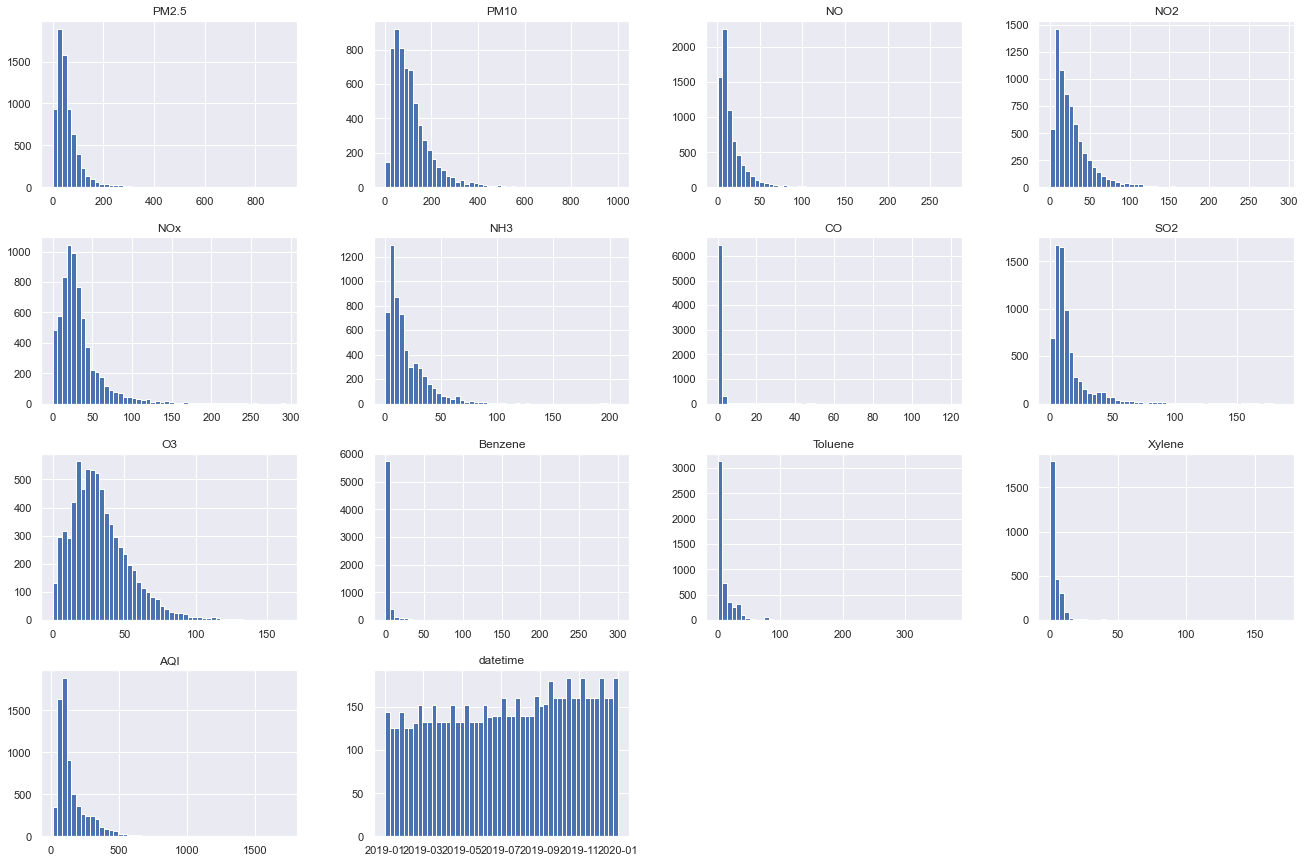

In [185]:
%matplotlib inline

air19_df.hist(bins = 50, figsize=(20,15))
plt.show()

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

In [186]:
df1 = flights_df
df2 = air19_df

df2["NO"].fillna(0, inplace=True)
df2["PM2.5"].fillna(0, inplace=True)
df2["PM10"].fillna(0, inplace=True)
df2["NO2"].fillna(0, inplace=True)
df2["NOx"].fillna(0, inplace=True)
df2["CO"].fillna(0, inplace=True)
df2["SO2"].fillna(0, inplace=True)
df2["O3"].fillna(0, inplace=True)
df2["Benzene"].fillna(0, inplace=True)
df2["Toluene"].fillna(0, inplace=True)
df2["Xylene"].fillna(0, inplace=True)
df2["NH3"].fillna(0, inplace=True)
df2["AQI"].fillna(0, inplace=True)
df2["AQI_Bucket"].fillna(0, inplace=True)

res = df1.merge(df2, left_on=['datetime', 'Source'], right_on=['datetime', 'City'])
print(res.shape)
print(res.City.unique())

res['total_chems'] = res['NO'] + res['PM2.5']\
                 + res['PM10'] + res['NO2']\
                 + res['CO'] + res['SO2']\
                 + res['O3'] + res['Benzene']\
                 + res['Toluene'] + res['Xylene']\
                 + res['NOx'] + res['NH3']

res['nitrogen_base'] = res['NO'] + res['NO2'] + res['NH3'] + res['NOx']
res['other_gas'] = res['Xylene'] + res['Benzene'] + res['Toluene']
res['particles'] = res['PM10'] + res['PM2.5']

corrmatrix = res.corr()
corrmatrix["Price"].sort_values(ascending=False)

# print("air19_df cities: ", air19_df.City.unique())
# print("flights_df Sources: ", flights_df.Source.unique())
# print("flights_df Dests: ", flights_df.Destination.unique())
# print("res cities: ", res.City.unique())

(8486, 28)
['Kolkata' 'Delhi' 'Chennai' 'Mumbai']


Price            1.000000
Toluene          0.258221
other_gas        0.189233
PM10             0.168896
particles        0.143458
NH3              0.130694
AQI              0.128755
total_chems      0.118997
NO2              0.090657
PM2.5            0.088246
Xylene           0.065017
O3               0.048288
SO2              0.042535
nitrogen_base    0.032364
CO               0.025537
Benzene          0.005729
NOx             -0.025415
NO              -0.033213
Name: Price, dtype: float64

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

### Relationships

- Target Variable: __Price__
- Predictor Variables: AQI, other_gas, nitrogen_base, Toluene, particles, total_chems, and PM10

*describe combined variables*

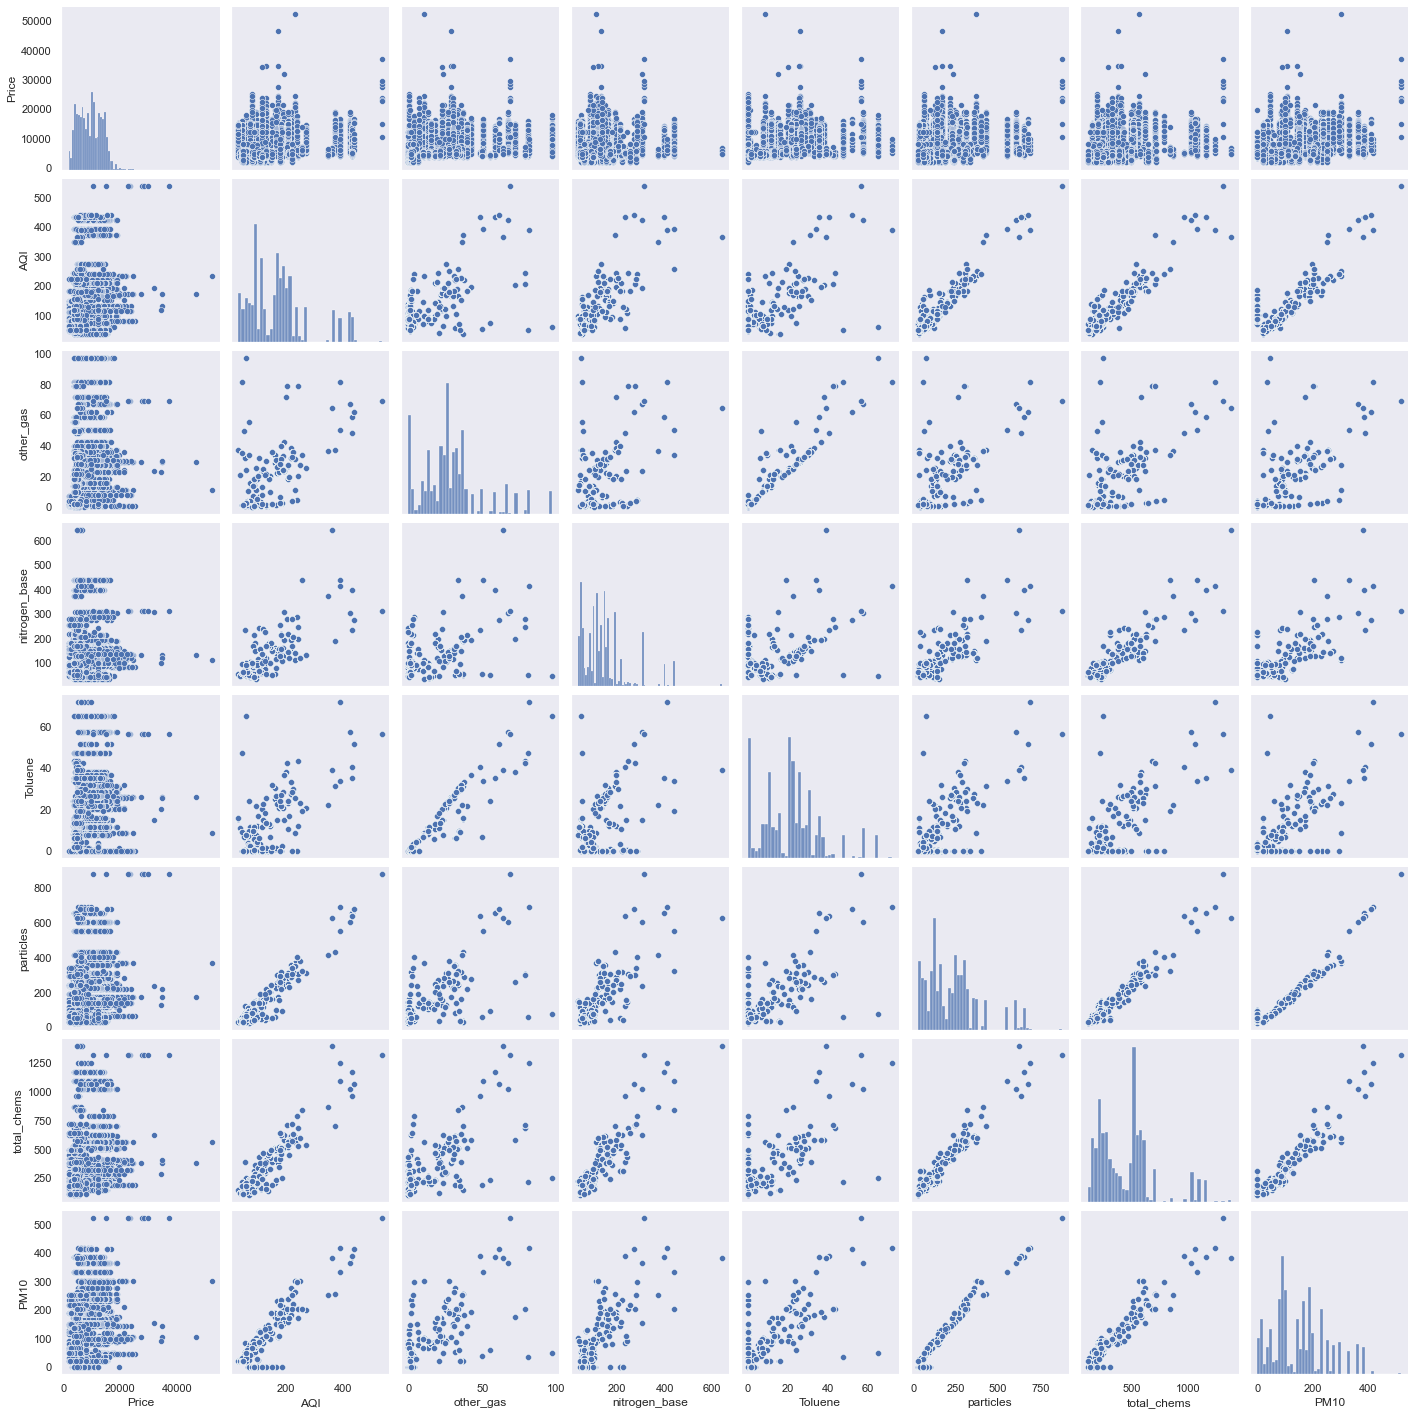

In [194]:
attributes = ["Price", "AQI", "other_gas","nitrogen_base", "Toluene", "particles", "total_chems", "PM10"]
sns.pairplot(res[attributes])

__Scatter Matrix__

The provided scatter matrix is helpful in seeing on first glance which variables we would like to explore further or even combine to help our case of creating an accurate prediction.


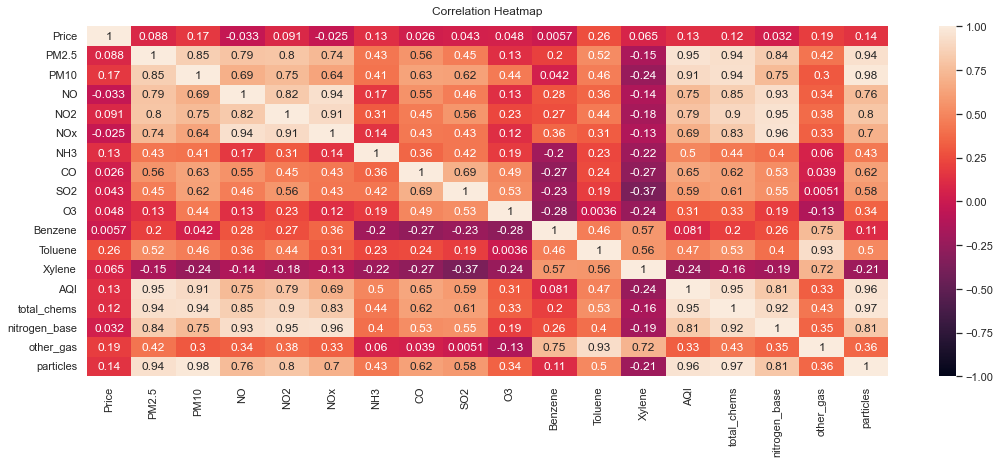

In [178]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(res.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

__Heatmap__

The heatmap provided above allows us to visualize our predictor variables and their correlations to not only the target variable, but also to other predictor variables.

<hr>

### Things To Reflect On

This is an additional section I wanted to add on to this project because there are a few things I wanted to talk about and reflect on from this project. In this section I will look back at problems I faced, initial ideas I had and my rationale behind them, what worked, and what did not.

To start, I would like to talk about the initial idea I had going into this. Upon choosing the airfare dataset, I started thinking about what relates to air travel. We considered doing gas prices, food prices, snack sales, etc. I noticed then that al flights in this dataset were India based so I explored more into India datasets that i could try to relate to airfare. Eventually, I stumbled onto this Air Quality dataset which I thought was perfect for what I was trying to do. I wanted to explore any correlations between the air quality and flight price. My thought here was to see if somehow, someway, price was related to air quality.

This idea brings me into my next point regarding the various problems I faced when trying to work with these datasets. Starting out, I examined each dataset and wanted to identify any attributes I could potentially relate together. I was also thinking about how I was going to merge the data together in a way that could aid me in finding any correlations between the data. My initial problem I faced was attempting to merge the data based on date. I realized this joined unrelated air quality of other cities in India with each other city because it was all based on the same day. From here I decided to merge the two datasets based on time AND Source city. My problem here, however, is I am leaving out destination cities that could potentially be important to finding correlations and providing more accurate data. Without a clear workaround, I continued my analysis of the datasets with the newly joined information.

From here, I discovered a couple of things. The first being that the correlation was not nearly as great as I had hoped. As seen above by the various plots, print outs, and statistics, I achieved a greatest correlation of around 0.25. I expected better but I remembered the idea shared in class that stated correlations of 0.6 or 0.8 are rather unrealistic and that it would be a "miracle" even if we got a correlation that great. With this idea helping me cope with my poor correlations, I attempted to formulate any relations I could. What worked for me was being able to visualize, through the use of seaborn plots, the various correlations not only with a certain attribute and price, but attributes to other attributes. I tried combining variables to see if I could achieve greater correlations which I could add to my list of "predictor variables."

Although I did not achieve the success I expected, it was still interesting to see how even things like Nitrogen Monoxide, particle gases, and other atmospheric gases have correlations to something so unrelated as airfare.